In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_pickle('D:\Projects\Cafe db\data')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10476\2140274798.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_pickle('D:\Projects\Cafe db\data')


In [4]:
df.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь,1 Квартал
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь,1 Квартал
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483044 entries, 0 to 483043
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rnm            483044 non-null  int64         
 1   num_check      483044 non-null  int64         
 2   datetime       483044 non-null  datetime64[ns]
 3   time_eat       483044 non-null  object        
 4   smena          483044 non-null  int64         
 5   good           483044 non-null  object        
 6   total_chek     483044 non-null  float64       
 7   price          483044 non-null  float64       
 8   pr_bez_nds     483044 non-null  float64       
 9   avg_price      483044 non-null  float64       
 10  profit         483044 non-null  float64       
 11  amount         483044 non-null  float64       
 12  position_good  483044 non-null  int64         
 13  summa          483044 non-null  float64       
 14  payment        483044 non-null  object        
 15  

**Анализ цен и поиск выбросов**

In [6]:
df['price'].median()

np.float64(65.0)

In [7]:
df['price'].mean()

np.float64(82.3224479136476)

In [8]:
data = np.array(df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2233d59fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x22339b44190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2232b8e7d90>],
 'medians': [<matplotlib.lines.Line2D at 0x22339b44410>],
 'fliers': [<matplotlib.lines.Line2D at 0x22339b44550>],
 'means': []}

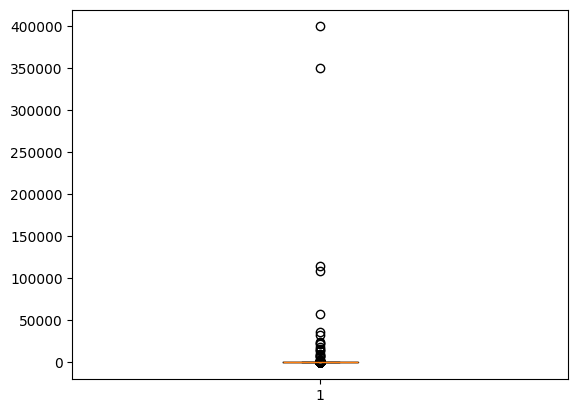

In [9]:
plt.boxplot(data)

In [10]:
df['price'].describe()

count   483,044.00
mean         82.32
std         812.09
min           2.00
25%          40.00
50%          65.00
75%         100.00
max     400,000.00
Name: price, dtype: float64

In [11]:
prc_75 = np.percentile(df['price'], 75)

In [12]:
prc_75

np.float64(100.0)

In [13]:
prc_25 = np.percentile(df['price'], 25)

In [14]:
prc_25

np.float64(40.0)

In [15]:
iqr = prc_75 - prc_25
iqr

np.float64(60.0)

In [155]:
lower_bound = prc_25 - 2.5 * iqr
upper_bound = prc_75 + 5 * iqr

In [156]:
print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")

Нижняя граница: -110.0, Верхняя граница: 400.0


In [193]:
result_weight_good = df[df['good'].str.contains(r'\s*кг\s*|цела', case=False, na=False)]
my_lst_tmp = result_weight_good['good'].to_list()

In [194]:
my_lst_tmp

['Студень из говяжьих ножек 1,0 кг',
 'Салат Оливье 1,0 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Буженина из свиной шеи 1,0 кг',
 'Медовик классический 1,0 кг',
 'Пицца Римская острая  целая',
 'Медовик шоколадный 1 кг',
 'Медовик  1 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Пирог с капустой и яйцом 1 кг',
 'Пирог с вишней 1 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Салат Оливье 1,0 кг',
 'Пирог с яблоком и брусникой 1 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Пирог с капустой и яйцом 1 кг',
 'Пирог с вишней 1 кг',
 'Салат Мимоза 1,0 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Салат Мимоза 1,0 кг',
 'Пирог с яблоком и брусникой 1 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Пирог с капустой и яйцом 1 кг',
 'Пирог с вишней 1 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Салат Оливье 1,0 кг',
 'Салат Оливье 1,0 кг',
 'Салат Оливье 1,0 кг',
 'Пирог с яблоком и брусникой 1 кг',
 'Пирог с капустой и яйцом 1 кг',
 'Пирог с капустой и яйцом 1 кг',
 'Пирог с вишней 1 кг',
 '

In [195]:
my_lst_tmp = set(my_lst_tmp)
my_lst_tmp = list(my_lst_tmp)

In [196]:
my_lst_tmp

['Пирог с яблоком и брусникой 1 кг',
 'Салат Оливье 1,0 кг',
 'Буженина из свиной шеи 1,0 кг',
 'Пицца Римская острая  целая',
 'Салат Сельдь под шубой 1,0 кг',
 'Салат Мимоза 1,0 кг',
 'Медовик классический 1,0 кг',
 'Медовик  1 кг',
 'Пирог с капустой и яйцом 1 кг',
 'Медовик шоколадный 1 кг',
 'Пирог с вишней 1 кг',
 'Медовик  1.7 кг',
 'Салат Столичный с курицей 1,0 кг',
 'Студень из говяжьих ножек 1,0 кг',
 'Пирог с мясом 1 кг']

In [197]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound) | df['good'].isin(my_lst_tmp)]

In [198]:
outliers.groupby(['good', 'price']).agg({'good': 'count'}).sort_values(by='price')

,,good
good,price,
"Медовик классический 1,0 кг",250.00,1
"Салат Сельдь под шубой 1,0 кг",300.00,1
"Салат Оливье 1,0 кг",300.00,1
"Студень из говяжьих ножек 1,0 кг",350.00,1
Пицца Римская острая целая,385.00,1
Пирог с капустой и яйцом 1 кг,400.00,24
Кулич Пасхальный 720 гр,500.00,3
"Салат Сельдь под шубой 1,0 кг",600.00,10
"Салат Оливье 1,0 кг",600.00,5


In [199]:
outliers['price'].describe()

count       112.00
mean     11,997.91
std      52,063.44
min         250.00
25%         400.00
50%         725.00
75%       1,200.00
max     400,000.00
Name: price, dtype: float64

In [200]:
get_out = outliers['good'].to_list()

In [201]:
get_out = set(get_out)

In [202]:
get_out

{'01.10.2024 Ипатов Н.А.',
 '13.08.2024',
 '14.10.2024',
 '21.10.2024',
 '29.03.24 Павел Титоренко',
 '30.10.2024',
 'Буженина из свиной шеи 1,0 кг',
 'Вагон-дом без шасси бытовка',
 'Вагончик складской на полозьях',
 'Кр.-манипул.устан. Bonfiglioli P10200L/2',
 'Кулич Пасхальный 720 гр',
 'Медовик  1 кг',
 'Медовик  1.7 кг',
 'Медовик классический 1,0 кг',
 'Медовик шоколадный 1 кг',
 'Мероприятие 01.08.2024',
 'Мероприятие 09.09.2024',
 'Мероприятие 16.09.2024',
 'Мероприятие Виноградова А.В.',
 'Пирог с вишней 1 кг',
 'Пирог с капустой и яйцом 1 кг',
 'Пирог с мясом 1 кг',
 'Пирог с яблоком и брусникой 1 кг',
 'Пирожки 12.01.24',
 'Пицца Римская острая  целая',
 'Прицеп-вагон дом  передвижной типа  Сибирь  А8х2,8 на базе тракт.прицепа VIN:1385 (QCS-1-1.2010.054)',
 'Салат Мимоза 1,0 кг',
 'Салат Оливье 1,0 кг',
 'Салат Сельдь под шубой 1,0 кг',
 'Салат Столичный с курицей 1,0 кг',
 'Студень из говяжьих ножек 1,0 кг',
 'УАЗ-390995 Автомобиль грузовой фургон (XTT390995B0417964)',
 'УР

In [203]:
get_out = list(get_out)
get_out

['Салат Оливье 1,0 кг',
 '29.03.24 Павел Титоренко',
 'УРАЛ-325512-0010-41 Средство транспортное специальное пассажирское № X1P325512B1369640',
 'Вагон-дом без шасси бытовка',
 'Медовик  1.7 кг',
 'Прицеп-вагон дом  передвижной типа  Сибирь  А8х2,8 на базе тракт.прицепа VIN:1385 (QCS-1-1.2010.054)',
 'Фуршет Барсукова',
 '13.08.2024',
 'Мероприятие Виноградова А.В.',
 'Электростанция дизельная с электростартером и коннектором автоматики DS 7000 DA ES',
 'Фуршет 15.01',
 'Пирог с яблоком и брусникой 1 кг',
 'Буженина из свиной шеи 1,0 кг',
 'Кр.-манипул.устан. Bonfiglioli P10200L/2',
 'Салат Сельдь под шубой 1,0 кг',
 'Медовик шоколадный 1 кг',
 'Пирог с вишней 1 кг',
 'Мероприятие 09.09.2024',
 'Студень из говяжьих ножек 1,0 кг',
 'Фуршет 02.04.24',
 '01.10.2024 Ипатов Н.А.',
 'Пицца Римская острая  целая',
 'мероприятие 15.07.2024',
 'Медовик  1 кг',
 '14.10.2024',
 '21.10.2024',
 'Мероприятие 16.09.2024',
 'Салат Мимоза 1,0 кг',
 'Медовик классический 1,0 кг',
 'Пирог с капустой и яй

In [204]:
df_filtered = df[~df['good'].isin(get_out)]

In [205]:
df_filtered.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь,1 Квартал
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь,1 Квартал
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал


{'whiskers': [<matplotlib.lines.Line2D at 0x22347255e50>,
 'caps': [<matplotlib.lines.Line2D at 0x223472560d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22347255d10>],
 'medians': [<matplotlib.lines.Line2D at 0x22347256350>],
 'fliers': [<matplotlib.lines.Line2D at 0x22347256490>],
 'means': []}

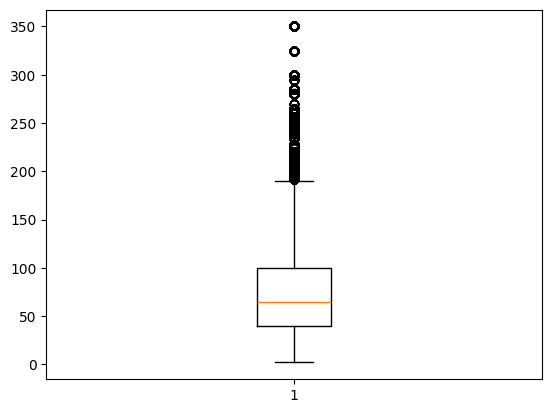

In [206]:
plt.boxplot(df_filtered['price'])

In [207]:
df_filtered.to_csv(r'D:\Projects\Cafe BI\fact_table_corr.csv', index=False)

In [208]:
df_filtered['price'].describe()

count   482,930.00
mean         79.56
std          60.67
min           2.00
25%          40.00
50%          65.00
75%         100.00
max         350.00
Name: price, dtype: float64

In [209]:
df_anomaly = df[df['good'].isin(get_out)]

In [ ]:
#df_anomaly.to_csv('anomaly_table.csv', index=False)

In [ ]:
#df_filtered.to_pickle(r'D:\Projects\Cafe db\filtered_data')

In [212]:
df_filtered.groupby('mnth')['check_unique'].count()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10476\3030223079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('mnth')['check_unique'].count()


mnth
Январь      41376
Февраль     48587
Март        48640
Апрель      51291
Май         47208
Июнь        40451
Июль        47891
Август      46837
Сентябрь    51239
Октябрь     59410
Ноябрь          0
Декабрь         0
Name: check_unique, dtype: int64

In [213]:
df_filtered.columns

Index(['rnm', 'num_check', 'datetime', 'time_eat', 'smena', 'good',
       'total_chek', 'price', 'pr_bez_nds', 'avg_price', 'profit', 'amount',
       'position_good', 'summa', 'payment', 'check_unique', 'group',
       'on-group', 'seasons', 'day', 'hour', 'date', 'revenue', 'mnth',
       'quart'],
      dtype='object')